In [23]:
# import dependencies
#data processing
import pandas as pd
import random as rand
import numpy as np
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
#Tree visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz




data = pd.read_csv('./fauxStudentGen.csv')
data.head()

,Student Id,Student Name,Gender,Birthday,Zip Code,Assignment Type,Subject Category,Available Points,Points Recieved,Homework assigned,Homework Submitted,Homework Assigned,Homework Duration
0,20.0,Daniel Ward,Male,2005-01-21,32204.0,In-Person,Creativity(STEM),20.0,7.0,2023-10-18,2023-10-28,NaN,NaN
1,56.0,Kristi Pena,Female,2006-05-02,32034.0,Virtual,Creativity(STEM),20.0,5.0,NaN,2023-10-29,2023-10-29,0.0
2,82.0,Mckenzie Martinez,Female,2005-04-12,32203.0,In-Person,Academics,10.0,0.0,NaN,2023-10-24,2023-10-21,3.0
3,40.0,Patrick Taylor,Male,2006-07-21,32203.0,Virtual,History and Tradition,50.0,41.0,2023-10-19,2023-10-23,NaN,NaN
4,60.0,Dorothy Hicks,Female,2003-09-16,32203.0,Virtual,Health & Wellness,40.0,0.0,NaN,2023-10-20,2023-10-16,4.0


/var/folders/4_/tl5y45h97j72d_pr9f2ddq6r0000gn/T/ipykernel_10510/3449598558.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot:>

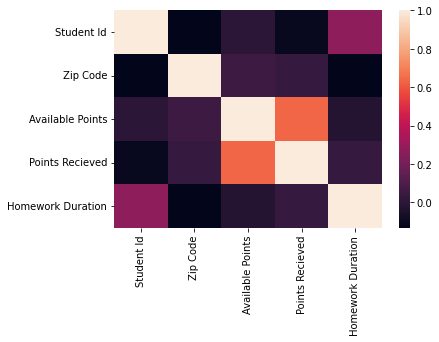

In [16]:
#Get descriptive statistics on data
%matplotlib inline
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [17]:
#descriptive stats on data generated
#rand.shuffle(data)



#splitting percentage
test_percentage = 0.10
#
validation_percentage = 0.20
#
train_percentage = 0.10

In [18]:
#calculate the splitting indices for array
test_split_ratio = int(test_percentage * len(data))
validation_split_ratio = int((validation_percentage + test_percentage) * len(data))


In [19]:
#use numpy split function to split and train dataset
test, valid, train = np.split(data, [test_split_ratio, validation_split_ratio])

In [20]:
## break data into two arrays, (x,y) to train function
## x = 
## y = 


##use test train split model to split function




In [21]:
#use random forest predicative analysis to test data
#use the data broken in last cell for further analysis

#from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier()


#clf.fit(features_train)